# CP : shalsabilillah.naufal@gmail.com

In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
df = pd.read_excel("by brand jan2018- sep2022.xls")
brand = df.loc[df['Brand'] == 'TOYOTA'] # Sesuaikan dengan brand yang mau ditampilkan

# Menampilkan rentang waktu penjualan dari setiap brand

In [3]:
brand['Period'].min(), brand['Period'].max()

(Timestamp('2018-01-30 00:00:00'), Timestamp('2022-09-30 00:00:00'))

In [4]:
brand = brand.groupby('Period')['Penjualan'].sum().reset_index()


In [5]:
brand = brand.set_index('Period')
brand.index

DatetimeIndex(['2018-01-30', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31',
               '2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31',
               '2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31',
               '2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30',
               '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31',
               '2021-09-30', '2021-10-31', '2021-11-30', '2021-12-31',
               '2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
               '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31',
      

# Menampilkan jumlah penjualan (Sesuaikan dengan tahun yang ingin dilihat)

In [6]:
y = brand['Penjualan'].resample('MS').mean()

In [7]:
y['2019':]

Period
2019-01-01    25248
2019-02-01    23226
2019-03-01    27608
2019-04-01    26611
2019-05-01    31871
2019-06-01    22123
2019-07-01    28179
2019-08-01    28022
2019-09-01    26529
2019-10-01    28495
2019-11-01    29672
2019-12-01    33420
2020-01-01    24928
2020-02-01    23884
2020-03-01    17787
2020-04-01     8443
2020-05-01     6727
2020-06-01    11196
2020-07-01    11531
2020-08-01    11057
2020-09-01    12523
2020-10-01    13466
2020-11-01    17908
2020-12-01    23215
2021-01-01    15292
2021-02-01    12537
2021-03-01    26445
2021-04-01    25902
2021-05-01    21117
2021-06-01    19392
2021-07-01    21933
2021-08-01    28169
2021-09-01    26454
2021-10-01    28367
2021-11-01    30651
2021-12-01    34240
2022-01-01    22906
2022-02-01    21187
2022-03-01    30935
2022-04-01    25789
2022-05-01    18000
2022-06-01    27385
2022-07-01    26502
2022-08-01    29996
2022-09-01    31190
Freq: MS, Name: Penjualan, dtype: int64

# Visualisasi penjualan dari setiap brand

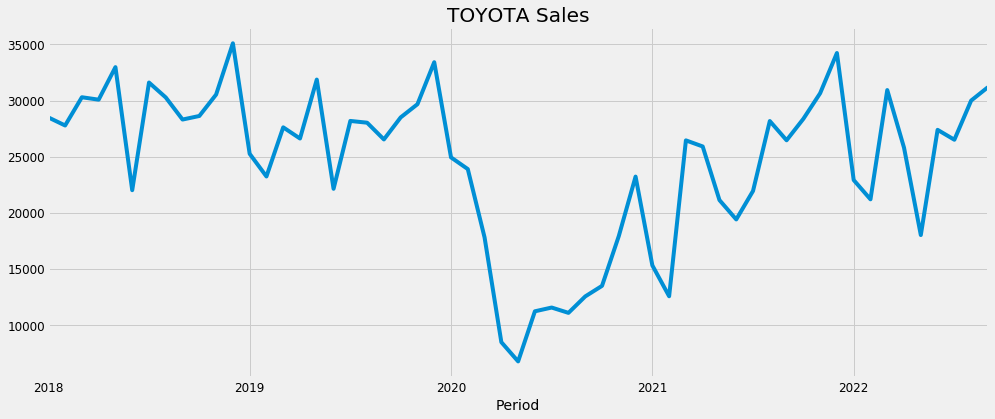

In [8]:
plt.title("TOYOTA Sales")
y.plot(figsize=(15, 6))
plt.show()

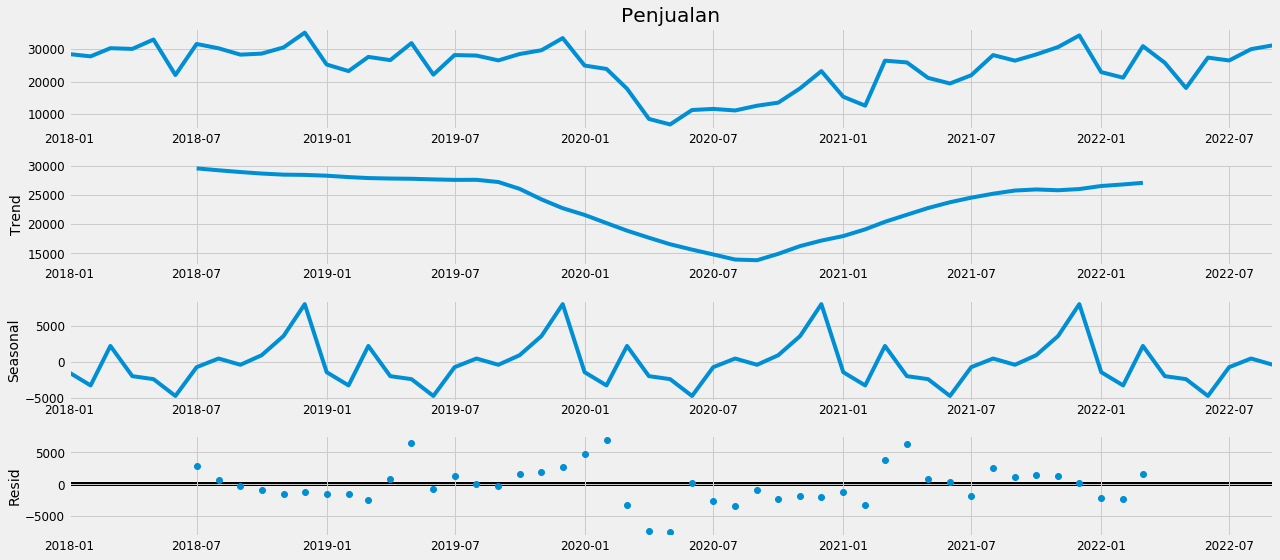

In [9]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [10]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [11]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1177      1.130     -0.104      0.917      -2.333       2.097
ma.L1         -0.0290      1.062     -0.027      0.978      -2.111       2.053
ar.S.L12      -0.5779      0.151     -3.815      0.000      -0.875      -0.281
sigma2       3.28e+07   5.84e-08   5.62e+14      0.000    3.28e+07    3.28e+07


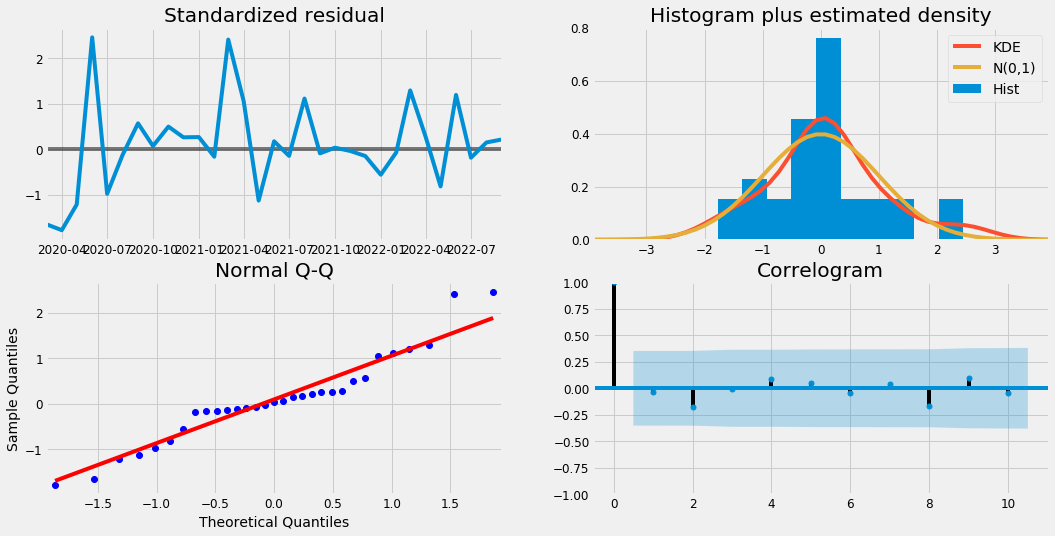

In [12]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

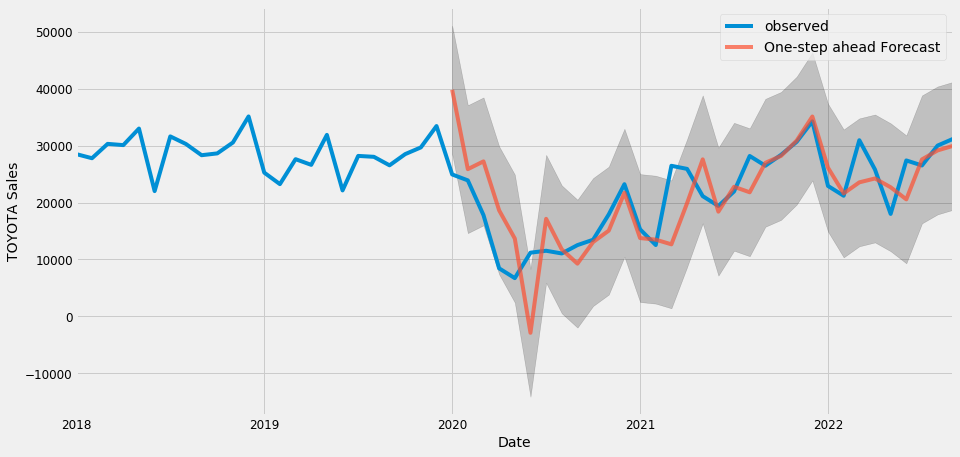

In [13]:
pred = results.get_prediction(start=pd.to_datetime('2020-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2018':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('TOYOTA Sales')
plt.legend()
plt.show()

In [14]:
y_forecasted = pred.predicted_mean
y_truth = y['2020-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 35468854.42


# Forecasting

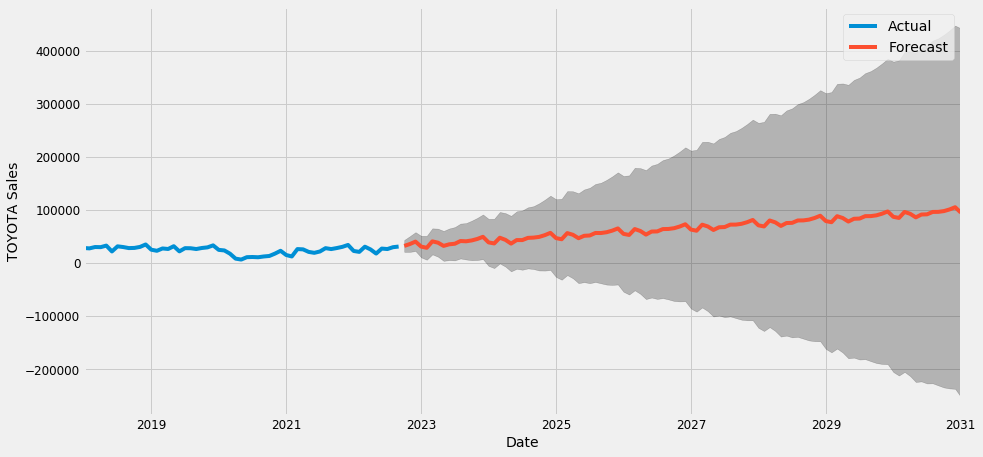

In [15]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='Actual', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('TOYOTA Sales')
plt.legend()
plt.show()